# Active contouring and edge detection
## Checkpoint - incomplete work
Using Metal Gear Solid- a videogame with character named "Solid Snake" to expain active contouring - "snake" algorithm (haha)

Fair use for educational purposes, I don't own the licence IP nor do I care.

In [2]:
import cv2 as cv
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

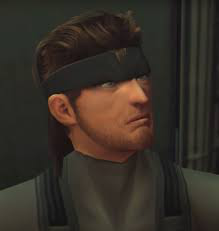

In [3]:
imdisp = Image.open('snake!!!.jpg')
imdisp

In [4]:
img = cv.imread('snake!!!.jpg', cv.IMREAD_GRAYSCALE)
np.shape(img)

(231, 219)

In [5]:
img

array([[39, 39, 39, ..., 22, 22, 22],
       [39, 39, 39, ..., 22, 22, 22],
       [40, 40, 40, ..., 22, 22, 22],
       ...,
       [55, 55, 55, ..., 38, 38, 38],
       [55, 54, 54, ..., 37, 37, 37],
       [54, 54, 53, ..., 37, 37, 37]], dtype=uint8)

In [6]:
kernel = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]

In [7]:
from scipy import signal
grad = signal.convolve2d(img,kernel)


Text(0.5, 1.0, 'convolved with edge detection kernel')

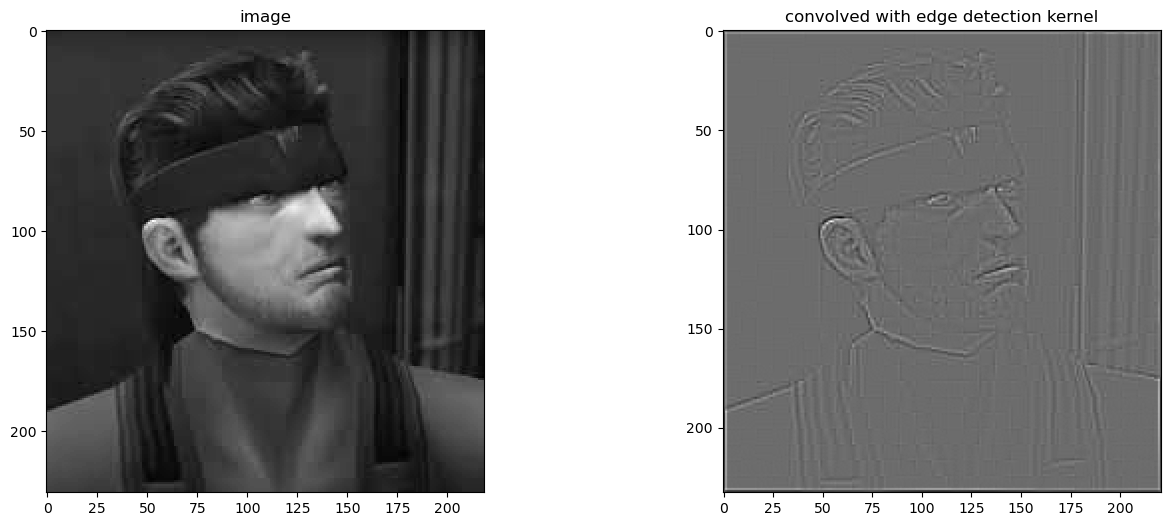

In [8]:
%matplotlib inline
fig,axes = plt.subplots(1,2,figsize=(16,6))

axes[0].imshow(img,cmap='gray')
axes[0].set_title("image")

axes[1].imshow(grad,cmap='gray')
axes[1].set_title("convolved with edge detection kernel")

In [9]:
at = 5 - [-1.23,4,0.34,-10.2]/np.sqrt(2)
c = abs(at)
print(c)

[ 5.86974134  2.17157288  4.75958369 12.21248917]


## Snak3 the whole image with a derivative

Text(0.5, 1.0, 'Snak3d!')

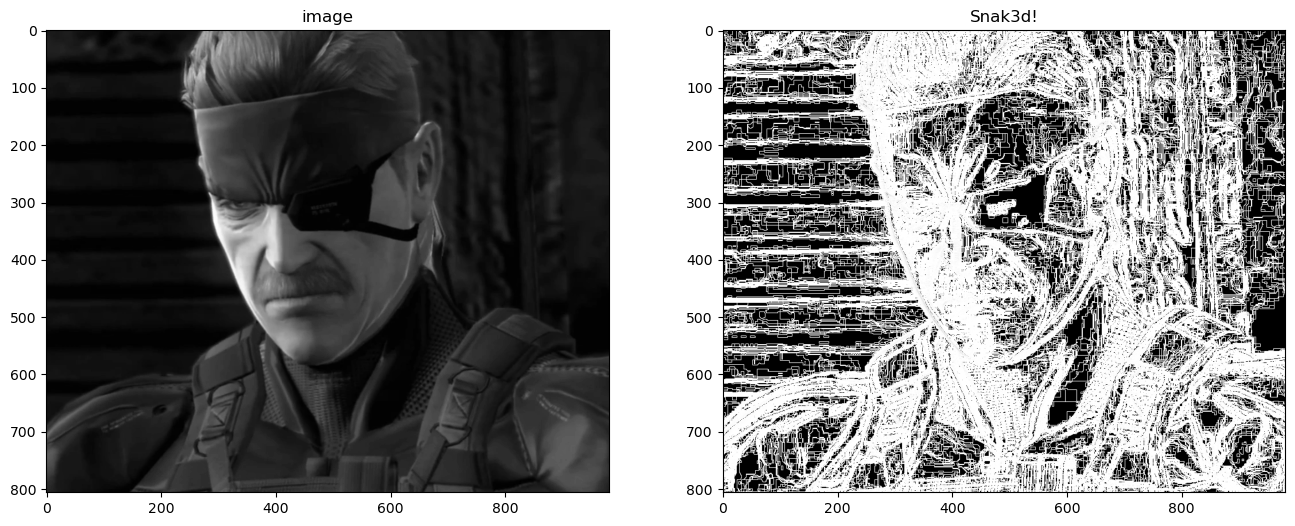

In [10]:
img = cv.imread("SnakeI15.webp", cv.IMREAD_GRAYSCALE)
#img = (np.min(img)) / (np.max(img) - np.min(img))

#along the axis
s = np.roll(img,1,axis=0)
n = np.roll(img,-1,axis=0)
e = np.roll(img,1,axis=1)
k = np.roll(img,-1,axis=1)
#corners be sure to divide by the square root of 2 because this is a spacial derivative!
se = np.roll(img,1,axis=(0,1))
ne = np.roll(img,(1,-1),axis=(0,1))
ak = np.roll(img,(1,-1),axis=(1,0))
ke = np.roll(img,(-1),axis=(0,1))

primary_directions = [abs(img-[s,n,e,k]),abs((img-[se,ne,ak,ke])/np.sqrt(2))]
primary_directions = np.reshape(primary_directions,(8,np.shape(img)[0],np.shape(img)[1]))
deriv_im = np.max(primary_directions,axis=0)


fig,axes = plt.subplots(1,2,figsize=(16,6))

axes[0].imshow(img,cmap='gray')
axes[0].set_title("image")

axes[1].imshow(deriv_im,cmap='gray')
axes[1].set_title('Snak3d!')

In [31]:
# active contouring example. Need to clearn up and rewrite it so it is correct.
# Idea is to drop in a snake at a given pixel location (x,y) for a given snake size (k), 
#then the snake traces out edges of the image, finding contours and features.
def SNAKE(image,x,y,k):
    start = image[x][y]
    lst = []
    lst.append(start)
    last=5
    direction = [[0,-1],[0,1],[-1,0],[1,0]]
    for i in range(k):
        new = 0
        if last != 0:
            north = image[x][y-1]
        else:
            north = 0
        if last != 1:
            south = image[x][y+1]
        else:
            south = 0
        if last != 2:
            east = image[x-1][y]
        else:
            east = 0
        if last != 3:
            west = image[x+1][y]
        else:
            west = 0
            
        derivative_list = [abs(north-start),abs(south-start),abs(east-start),abs(west-start)]
        #print(derivative_list)
        new = np.min(derivative_list)
        last = derivative_list.index(new)
        lst.append(new)
        x += direction[last][0]
        y += direction[last][1]
    return lst

In [32]:
SNAKE(img,60,90,5)

[36, 0, 0, 0, 0, 0]

# Edge detection from image gradient

The image gradient $-|\nabla I(x,y)|^2$, you can also introduce a Gaussian with standard deviation 1 to smooth the junk out and avoid some local minima $-|G_{\sigma} \nabla^2 I^2|^2$ -Thanks Wikipedia!

In [ ]:
#example here

# The scikit-learn example
(wtf)

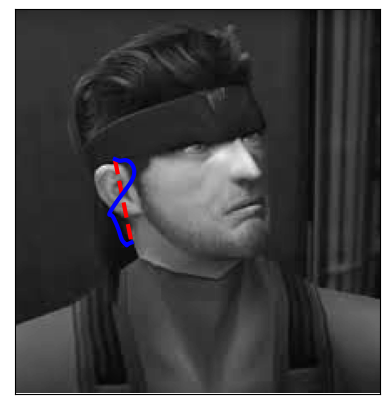

In [7]:
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
#(60,90)-(70,140) 
#s = np.linspace(0, 2*np.pi, 200)
#r = 100 + 100*np.sin(s)
#c = 100 + 100*np.cos(s)
#init = np.array([r, c]).T
#plt.plot(init[:, 1], init[:, 0], '--r', lw=3)
#snake = active_contour(gaussian(img, 3, preserve_range=False),
#                       init, alpha=0.015, beta=10, gamma=0.001)
#(5, 136) and (424, 50),
#r = np.linspace(136, 50, 100)
#c = np.linspace(5, 424, 100)
r = np.linspace(90, 140, 100)
c = np.linspace(60, 70, 100)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 1, preserve_range=False),
                       init, boundary_condition='fixed',
                       alpha=0.1, beta=1.0, w_line=-5, w_edge=0, gamma=0.1)

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
plt.show()

In [ ]:
#he has an ear.. yes..